In [183]:
# Hedging a call with the CPM payoff
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


S0 = 100
SStar = 100
# Simulate m(t)
numSims = 10000
# Observation period once per minute
periodsInAYear = 365
T = 30
mu = 0
sig = 0.2 # period vol
t = np.linspace(0,T,T)/periodsInAYear + 0.000001
tte = np.flip(t)

# Simulate over range of annualised volatility


LND_rebal = np.zeros((numSims,1)) # linear notional delta with rebalancing
LND_log = np.zeros((numSims,1)) # linear notional delta with log
LND_variance = np.zeros((numSims,1))
sumVar =np.zeros((numSims,1))
lastS =np.zeros((numSims,1))

for iSim in range(numSims):
    W = np.append(0, np.cumsum(np.random.normal(0,1,T-1)))
    S = S0*np.exp( (mu - 0.5*sig**2)*t + sig*W*np.sqrt(1/periodsInAYear))
    dS = np.append(0,np.diff(S))
    dlnS = np.append(0, np.diff(np.log(S)))
    dlnSsq = np.append(0, np.diff(np.log(S)))**2
    
    # Functions of S
    dfS = np.vstack((dS, dlnS, dlnSsq)).transpose()    
    dtte = np.diff(tte)    
    # Push target delta 1 forward for (t,t+1) rebalancing
    targetDelta = np.append(0,1/S[:-1] - 1/SStar)
    zeroWt = np.zeros((1,T))
    onesWt = np.ones((1,T))
    
    # Weights for ordinary rebal to constant delta notional
    omegaRebal = np.vstack((targetDelta, zeroWt, zeroWt )).transpose()
    LND_rebal[iSim] = np.sum(omegaRebal*dfS) # linear notional delta with rebalancing
    # Weights for log contract version
    omegaLog = np.vstack((-onesWt/SStar, onesWt, zeroWt )).transpose()
    LND_log[iSim] = np.sum(omegaLog*dfS) # log + futures replication
    # Weights for variance version
    omegaVar = np.vstack((targetDelta, zeroWt, -onesWt*0.5 )).transpose()
    LND_variance[iSim] = np.sum(omegaVar*dfS) # variance replication
    # Total variance
    sumVar[iSim] = np.sum(dlnSsq)
    lastS[iSim] = S[-1]

    
    

In [149]:
S

array([ 99.999998  , 100.02622956, 101.10045714, 100.90901221,
       103.374754  , 101.97096468, 102.52533089, 102.80694714,
       103.46518542, 103.50485468, 103.95376245, 103.13522161,
       103.30545432, 105.70167772, 106.56339182, 107.21566298,
       105.42847717, 104.352491  , 103.21786543, 101.81203608,
        99.52987611, 100.18639268,  99.92177697, 100.48230161,
       100.74399004,  99.90317249,  98.26970282,  97.50817782,
        96.82716125,  95.90003951])

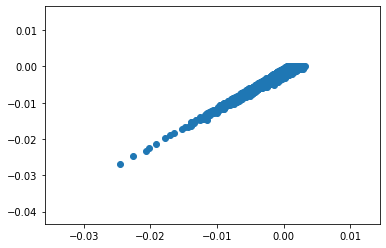

In [195]:
plt.scatter(LND_rebal, LND_log)

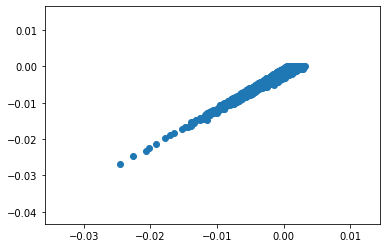

In [196]:
plt.scatter(LND_rebal, LND_variance)

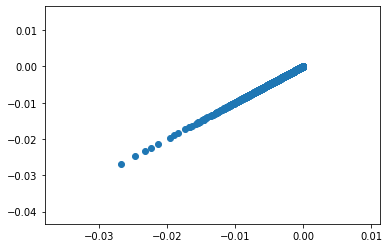

In [197]:
plt.scatter(LND_variance, LND_log)

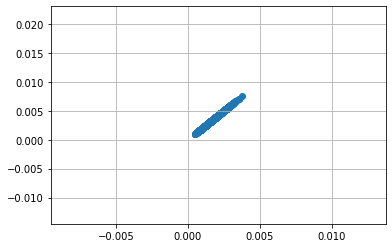

In [203]:
plt.scatter(LND_rebal - LND_log, sumVar)
plt.grid(True)